#### проста нейромережа з 2х нейронів у схованому шарі, за 3 вхідними параметрами, побудована вручну

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# activation function
def f(x):
    return 2 / (1 + np.exp(-x)) - 1

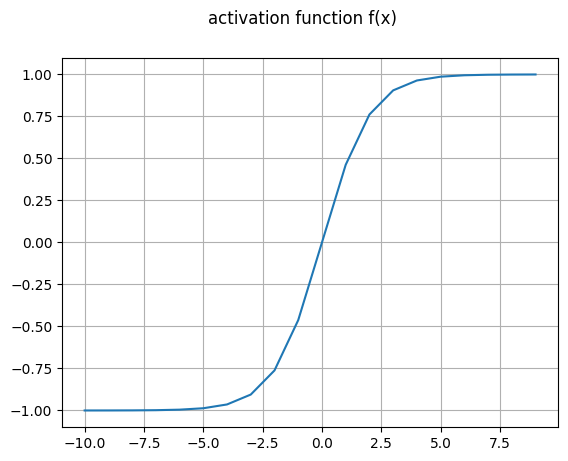

In [9]:
def draw_2simple_2d(x1: np.array, y1: np.array, suptitle: str) -> None:
    fig, axs = plt.subplots(1, 1)

    axs.plot(x1, y1)
    axs.grid()
   
    fig.suptitle(suptitle)


x = np.array([point * 1 for point in range(-10, 10)])

draw_2simple_2d(x, f(x), suptitle='activation function f(x) - htg')

In [11]:
def df(x):
    return 0.5 * (1 + x) * (1 - x)

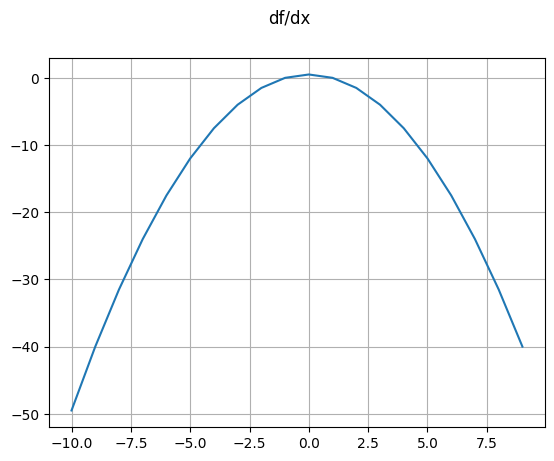

In [12]:
draw_2simple_2d(x, df(x), suptitle='df/dx')

In [18]:
W1 = np.random.rand(2, 3)  # layer 1  num_x=3, num_n_layer_1=2
W2 = np.random.rand(2)  # # layer 2  num_n_layer_1=2, num_n_layer_2=1

In [19]:
def model_NN_go_forward(input_x):
    sum_from_x_to_layer_1 = np.dot(W1, input_x)
    out_from_layer_1 = np.array([f(x) for x in sum_from_x_to_layer_1])

    sum_from_out_from_layer_1 = np.dot(W2, out_from_layer_1)
    y = f(sum_from_out_from_layer_1)

    return (y, out_from_layer_1)

In [23]:
def train(epoch):
    global W2, W1
    learning_rate = lrt = 0.01
    N_iterations = N = 10000
    count = len(epoch)  # розмір тренувальної вибірки
    for k in range(N):
        x = epoch[np.random.randint(0, count)]  # на кожній ітерації обираємо вхідний вектор х
        y, out_from_layer_1 = model_NN_go_forward(x[0:3])  # отримуємо прогнозовані результати за моделлю нейронки
        error = y - x[-1]  # predict - true
        delta = error * df(y)  # визначаємо локальний градієнт
        W2[0] -= lrt * delta * out_from_layer_1[0]  # коректуємо ваги для останнього шару (перша вага) 
        W2[1] -= lrt * delta * out_from_layer_1[1]  # коректуємо ваги для останнього шару (друга вага) 

        delta2 = W2 * delta * df(out_from_layer_1)  # локальні градієнти для передостаннього шару (layer_1)

        W1[0, :] -= lrt * delta2[0] * np.array(x[0:3])  # коректуємо ваги передостаннього шару (layer_1) (перша вага)
        W1[1, :] -= lrt * delta2[1] * np.array(x[0:3])  # коректуємо ваги передостаннього шару (layer_1) (друга вага)
        

In [20]:
# набір даних вибірки, x1, x2, x3, y_true
# в даному випадку вся вибірка(epoch) як всі можливі варіанти в одному наборі з якого рандомно обиратимемо значення для кожної ітерації
epoch = [
         (-1, -1, -1, -1),
         (-1, -1, 1, 1),
         (-1, 1, -1, -1),
         (-1, 1, 1, 1),
         (1, -1, -1, -1),
         (1, -1, 1, 1),
         (1, 1, -1, -1),
         (1, 1, 1, -1)
        ]

In [24]:
# проводимо навчання
train(epoch)

In [25]:
for x in epoch:  # для кожного з можливих варіантів вхідних параметрів порівняємо відповідність реальним значенням значень моделі
    y, out_from_layer_1 = model_NN_go_forward(x[0:3])
    print(f'Result by model NN: {y} => true = {x[-1]}')

Result by model NN: -0.04861422994227571 => true = -1
Result by model NN: 0.9591910381097826 => true = 1
Result by model NN: -0.891928173781186 => true = -1
Result by model NN: 0.8927757342993821 => true = 1
Result by model NN: -0.8927757342993822 => true = -1
Result by model NN: 0.8919281737811857 => true = 1
Result by model NN: -0.9591910381097827 => true = -1
Result by model NN: 0.04861422994227582 => true = -1
